#### Imports

In [342]:
import pandas as pd
import seaborn as sns
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

#### Reading the dataset

In [343]:
data = pd.read_csv('seeds_dataset.csv')

data

# 1 = Kama, 2 = Rosa and 3 = Canadian

,area,perimeter,compactness,kernel_length,kernel_width,asymetry_coefficient,length_of_kernel_groove,classification
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [344]:
X = data.drop(['classification'], axis=1)
y = data['classification']

y.unique()

array([1, 2, 3], dtype=int64)

In [345]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

# Shift y values to start from zero
y = y - y.min()

print(X_scaled)
y.unique()

[[0.44098206 0.50206612 0.5707804  ... 0.48610121 0.18930164 0.34515017]
 [0.40509915 0.44628099 0.66243194 ... 0.50106914 0.03288302 0.21516494]
 [0.34938621 0.34710744 0.87931034 ... 0.50392017 0.25145302 0.1506647 ]
 ...
 [0.24645892 0.25826446 0.7277677  ... 0.42908054 0.98166664 0.26440177]
 [0.11803588 0.16528926 0.39927405 ... 0.14682823 0.36834441 0.25849335]
 [0.16147309 0.19214876 0.54718693 ... 0.24518888 0.63346292 0.26784835]]


array([0, 1, 2], dtype=int64)

#### Convert the y to categorical

In [346]:
y_converted = to_categorical(y)

y_converted

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

#### Split the data in training and testing sets

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_converted, test_size=0.2, random_state=1)

#### Defining the model

In [348]:
model = Sequential()

# Input layer
model.add(Dense(7, activation='relu', input_shape=(7,)))

# Hidden layer
model.add(Dense(14, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=2, verbose=1)

Epoch 1/20


C:\Users\Bazar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3813 - loss: 1.0641 
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5394 - loss: 0.9719
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6719 - loss: 0.8718
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7192 - loss: 0.7407
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8144 - loss: 0.6009
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8801 - loss: 0.5564
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8565 - loss: 0.4925
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8684 - loss: 0.4430
Epoch 9/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9094 - loss: 0.4191
Epoch 10/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9027 - loss: 0.3670
Epoch 11/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9028 - loss: 0.2967
Epoch 12/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9030 - loss: 0.2905

#### Testing the model

In [349]:
score = model.evaluate(X_test, y_test, verbose=1)

score

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9841 - loss: 0.1500  


[0.16715234518051147, 0.976190447807312]

In [350]:
y_predict = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


#### Visualizing the model performance

Text(70.72222222222221, 0.5, 'Actual Class')

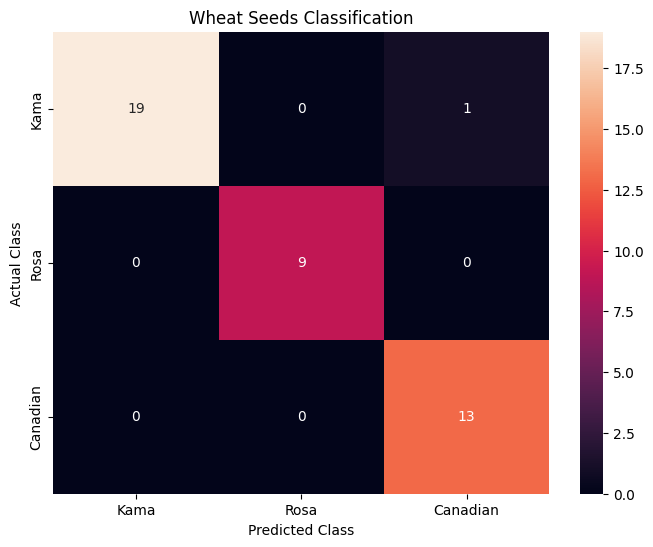

In [351]:
# Convert y_predict back to categorical labels
y_predict_labels = np.argmax(y_predict, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

cm = pd.DataFrame(
    confusion_matrix(y_test_labels, y_predict_labels),
    index=['Kama', 'Rosa', 'Canadian'],
    columns=['Kama', 'Rosa', 'Canadian'])

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.title('Wheat Seeds Classification')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')